# Homework 7 writeups

**Name:** Oorjit Chowdhary

**Section:** AMATH 301 B

## Problem 1

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate

s = 77.27
w = 0.161
q = 1

y1_prime = lambda y1, y2, y3: s*(y2 - y1*y2 + y1 - q*y1**2)
y2_prime = lambda y1, y2, y3: 1/s* (-y2 - y1 * y2 + y3)
y3_prime = lambda y1, y2, y3: w * (y1 - y3)

y1_0 = 1
y2_0 = 2
y3_0 = 3
y0 = np.array([y1_0, y2_0, y3_0])

### Part a - Timing RK45 and BDF

In [30]:
# Logarithmically spaced points for q
qspan = np.logspace(0, -5, 10)

# Time values for each q value
time_rk45 = np.zeros(len(qspan))
time_bdf = np.zeros(len(qspan))

# RK45 timer for each q
for index, q in enumerate(qspan):
    y1_prime = lambda y1, y2, y3: s*(y2 - y1*y2 + y1 - q*y1**2)
    odefun = lambda t, y: np.array([y1_prime(y[0], y[1], y[2]), y2_prime(y[0], y[1], y[2]), y3_prime(y[0], y[1], y[2])])

    time_0 = time.perf_counter()
    sol = scipy.integrate.solve_ivp(odefun, [0, 30], y0)
    time_i = time.perf_counter() - time_0
    time_rk45[index] = time_i

print("RK45 time values at each q:", time_rk45)

# BDF timer for each q
for index, q in enumerate(qspan):
    y1_prime = lambda y1, y2, y3: s*(y2 - y1*y2 + y1 - q*y1**2)
    odefun = lambda t, y: np.array([y1_prime(y[0], y[1], y[2]), y2_prime(y[0], y[1], y[2]), y3_prime(y[0], y[1], y[2])])

    time_0 = time.perf_counter()
    sol = scipy.integrate.solve_ivp(odefun, [0, 30], y0, method="BDF")
    time_i = time.perf_counter() - time_0
    time_bdf[index] = time_i

print("BDF time values at each q:", time_bdf)

RK45 time values at each q: [2.12387500e-03 1.03477334e-01 5.90362920e-02 3.91462090e-02
 3.63556670e-02 7.67165420e-02 2.68152083e-01 9.45407500e-01
 3.34381533e+00 1.19257095e+01]
BDF time values at each q: [0.00385038 0.00551083 0.00638638 0.00797275 0.01646154 0.02717754
 0.03180287 0.03739267 0.03702042 0.0419315 ]


### Part b - Create a loglog plot

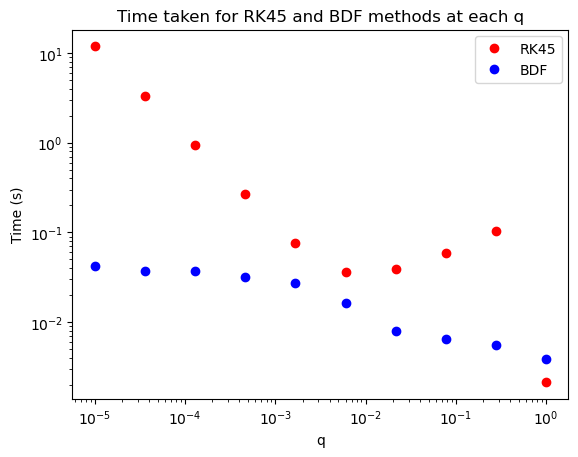

In [31]:
plt.figure()
plt.title("Time taken for RK45 and BDF methods at each q")
plt.loglog(qspan, time_rk45, 'or', label="RK45")
plt.loglog(qspan, time_bdf, 'ob', label="BDF")
plt.xlabel("q")
plt.ylabel("Time (s)")
plt.legend()

### Part c - Create a 2 panel figure.

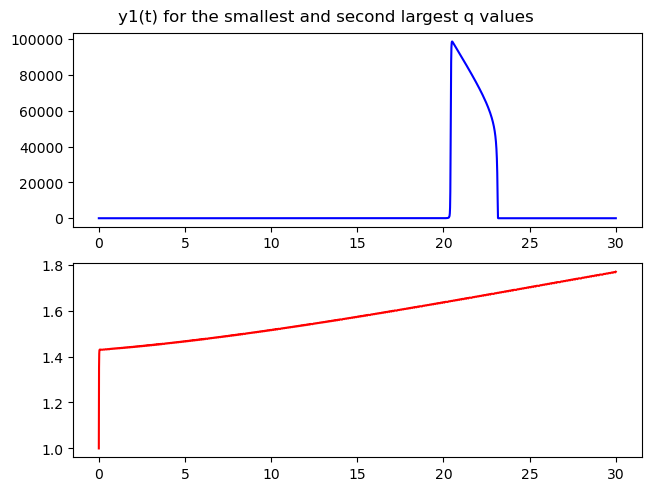

In [32]:
smallest_q = qspan[-1]
second_largest_q = qspan[1]

y1_prime = lambda y1, y2, y3: s*(y2 - y1*y2 + y1 - smallest_q*y1**2)
odefun = lambda t, y: np.array([y1_prime(y[0], y[1], y[2]), y2_prime(y[0], y[1], y[2]), y3_prime(y[0], y[1], y[2])])
sol = scipy.integrate.solve_ivp(odefun, [0, 30], y0)
y1_smallest_q = sol.y[0, :]

y1_prime = lambda y1, y2, y3: s*(y2 - y1*y2 + y1 - second_largest_q*y1**2)
odefun = lambda t, y: np.array([y1_prime(y[0], y[1], y[2]), y2_prime(y[0], y[1], y[2]), y3_prime(y[0], y[1], y[2])])
sol2 = scipy.integrate.solve_ivp(odefun, [0, 30], y0)
y1_second_largest_q = sol2.y[0, :]

x = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(2, 1, constrained_layout=True)
fig.suptitle("y1(t) for the smallest and second largest q values")
ax[0].plot(sol.t, y1_smallest_q, 'b')
ax[1].plot(sol2.t, y1_second_largest_q, 'r')

### Part d - Comment on what we see.

##### Part (i) - Compare the two methods
Generally, the BDF method is better as it follows a linear trend and takes less time to compute than RK45. The RK45 steadily decreases the time taken as q value increases, but increases time again before suddenly dropping below the BDF for the largest q value. At the largest q value, the RK45 method turns out to be better.

##### Part (ii) - Time as q increases
The time taken for RK45 and decreasing q values forms to a quadratic trend with the exception of q = 1. When we see the data point at q = 1 as an outlier, we can see the red dots in the graph forming a parabola.

##### Part (iii) - What makes calculation slower for RK45?
When we use an explicit method like RK45, very small step sizes are needed to solve the problem, minimizing the error. At smaller q values, these step sizes become prohibitively small, which is why they lead to a higher runtime.

##### Part (iv) - Is this equation stiff? How do we know?
Yes, the equation is still for small q as the vector field rapidly changes and goes all the way vertically straight up from being horizontal earlier around the time = 20 secs.

## Problem 2

### Part a - Ratio of points, RK45 to BDF.

In [33]:
mu = 200
x0 = 2
y0 = 0
z0 = np.array([x0, y0])

dxdt = lambda x, y: y
dydt = lambda x, y: mu * (1 - x**2) * y - x
ode = lambda t, z: np.array([dxdt(z[0], z[1]), dydt(z[0], z[1])])

sol = scipy.integrate.solve_ivp(ode, [0, 400], z0)
sol_bdf = scipy.integrate.solve_ivp(ode, [0, 400], z0, method="BDF")

p_rk45 = len(sol.t)
p_bdf = len(sol_bdf.t)

print("RK45 number of points:", p_rk45)
print("BDF number of points:", p_bdf)

ratio = p_rk45 / p_bdf
print("Ratio of RK45 points to BDF points:", ratio)

difference = p_rk45 - p_bdf
print("Difference between RK45 points and BDF points:", difference)

RK45 number of points: 46401
BDF number of points: 298
Ratio of RK45 points to BDF points: 155.70805369127515
Difference between RK45 points and BDF points: 46103


#### Part b - Plot solution, x(t)

Text(0.5, 1.0, 'BDF for x(t) vs t for mu = 200, x(0) = 2, y(0) = 0')

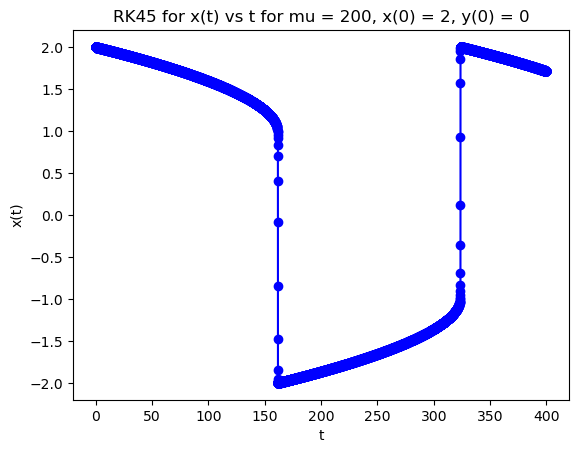

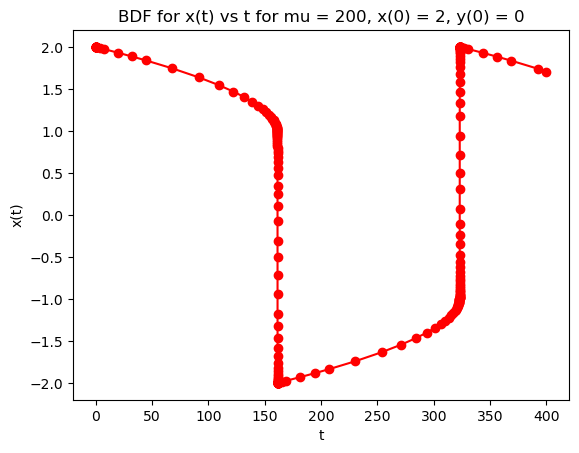

In [34]:
mu = 200

dxdt = lambda x, y: y
dydt = lambda x, y: mu * (1 - x**2) * y - x
ode = lambda t, z: np.array([dxdt(z[0], z[1]), dydt(z[0], z[1])])

x0 = 2
y0 = 0
z0 = np.array([x0, y0])

sol = scipy.integrate.solve_ivp(ode, [0, 400], z0)
A8 = sol.y[0, :]

sol_bdf = scipy.integrate.solve_ivp(ode, [0, 400], z0, method="BDF")
A9 = sol_bdf.y[0, :]

plt.figure()
plt.plot(sol.t, A8, '-ob')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("RK45 for x(t) vs t for mu = 200, x(0) = 2, y(0) = 0")

plt.figure()
plt.plot(sol_bdf.t, A9, '-or')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("BDF for x(t) vs t for mu = 200, x(0) = 2, y(0) = 0")


##### Part c - Plot x(t) vs. y(t) (y(t) on vertical axis)

Text(0.5, 1.0, 'BDF for x(t) vs t for mu = 200, x(0) = 2, y(0) = 0')

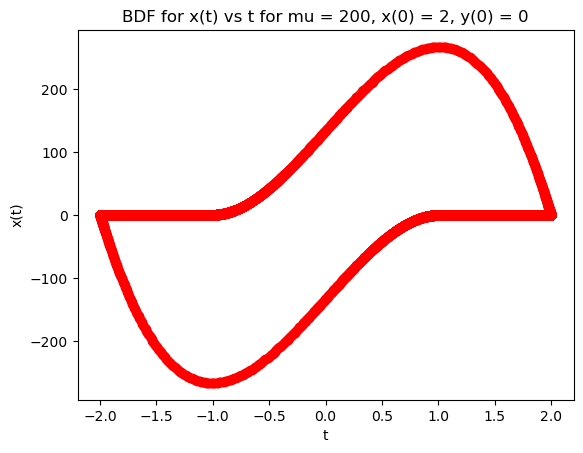

In [35]:
sol_bdf = scipy.integrate.solve_ivp(ode, [0, 400], z0, method="BDF", t_eval=np.linspace(0, 400, 10000000))
plt.figure()
plt.plot(sol_bdf.y[0, :], sol_bdf.y[1, :], '-or')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("BDF for x(t) vs t for mu = 200, x(0) = 2, y(0) = 0")

##### Part d - Discussion
This ODE is stiff because the RK45 method requires a significantly higher number of points than the BDF method to obtain a smooth curve. Also, the shape for the RK45 method is much steeper and changes more rapidly than the shape of the BDF method. As per my understanding of vector fields, this ODE will be stiff because the vector field is rapidly changing in a small region. This also implies that solving this problem will require a very small step size to accurately capture the trend and minimize the error when using explicit methods like the RK45 or the BDF.